# Opening Remarks
## <font color=peru>Welcome to the InfoSec Jupyterthon 2024!</font>

![](media/day1-01_01_banner.gif "Infosec Jupyterthon")

# <font color=dimgray>Roberto Rodriguez</font> <font color=cadetblue>@Cyb3rWard0g</font>

<img src="media/day1-01_02_Roberto.jpg" align="right"/>

* Microsoft Security Research Organization
* I ❤️ Dogs and Open Source!
* Read > Blog > Tweet > Repeat!
* Founder of the Open Threat Research (OTR) Community!
    * https://github.com/OTRF
* Cooking Recipes: https://infosecwelldone.com/ 


# <font color=dimgray>Industry 2024</font>

In [2]:
import pandas as pd
import altair as alt
alt.renderers.enable('default')

df = pd.read_csv("data/InfosecJupyterthon2024-Stats.csv")
top_10 = df['Industry'].value_counts()[:10].to_frame().reset_index()

bars = alt.Chart(top_10, title='Industry 2024').mark_bar().encode(
    x=alt.X('Industry', axis=alt.Axis(title='Count')),
    y=alt.Y('index', axis=alt.Axis(title='Industry'), sort='-x'),
    color=alt.Color('index', legend=None)
).properties(height = 350, width=600)

text = bars.mark_text(align='center',baseline='middle',dx=10,dy=0).encode(text='Industry')

bars + text

alt.LayerChart(...)

# <font color=dimgray>Jupyter Notebooks Level 2024</font>
![](media/day1/community-jupyter-level-2020.png)

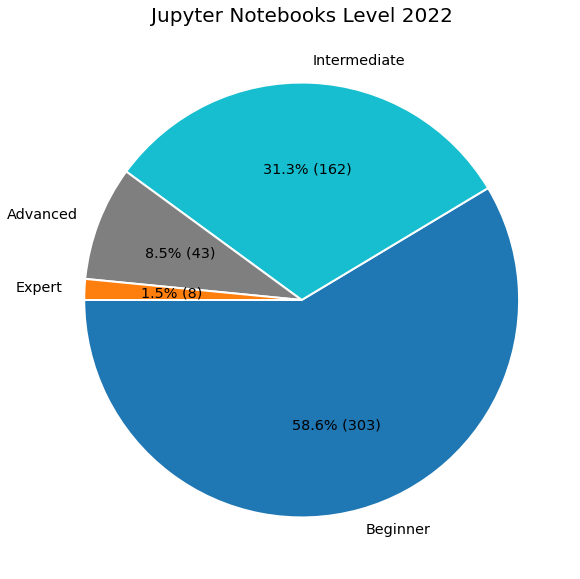

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("data/InfosecJupyterthon2022-Stats.csv")
top_10 = df['JupyterNotebookLevel'].value_counts()[:10].to_frame().reset_index()
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}% ({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 10))
ax.pie(top_10['JupyterNotebookLevel'],labels = top_10['index'],colors = colors,
       autopct = lambda pct: func(pct, top_10['JupyterNotebookLevel']),
       startangle=180,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},textprops={'size': 'x-large'}
)
ax.set_title('Jupyter Notebooks Level 2024', fontsize=20)
plt.show()

# <font color=dimgray>What do you expect to learn about Jupyter Notebooks in this event?</font>

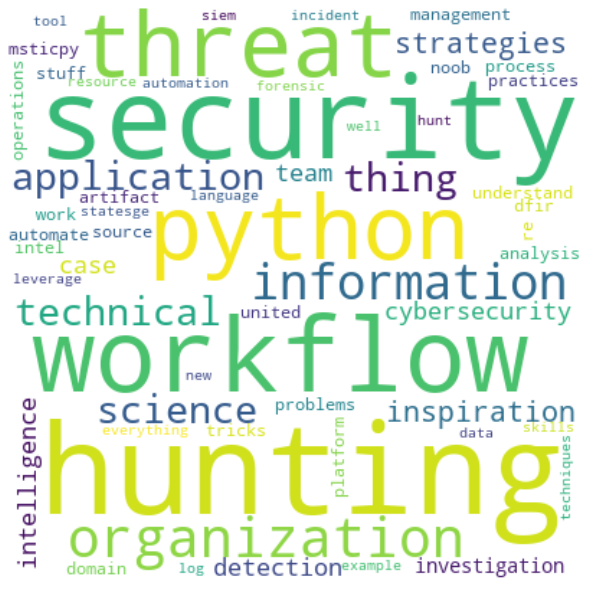

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("data/InfosecJupyterthon2022-Stats.csv")
expectations= df['Expectations'].dropna().values

tokens = list()
for line in expectations:
    [tokens.append(token.lower()) for token in str(line).split()]

text = " ".join(i for i in set(tokens))

[STOPWORDS.add(n) for n in ['notebook', 'notebooks', 'jupyter', 'infosec','etc']]
wordcloud = WordCloud(
    width=400,height=400,background_color='white',stopwords=set(STOPWORDS),min_font_size = 10
).generate(text) 
                      
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

# <font color=dimgray>Housekeeping</font> 

* **📺 Recordings**
  * Today’s event is being recorded.
  * Subscribe to OTR YouTube Channel: https://bit.ly/OTRYouTubeSub
  * YouTube Stream Links:
    * https://aka.ms/JupyterthonLiveDay1
    * https://aka.ms/JupyterthonLiveDay2
* **⏳ Timekeeping**
  * **Agenda:** [https://infosecjupyterthon.com/2024/agenda.html](https://infosecjupyterthon.com/2024/agenda.html)
  * **Timezone:** Eastern Time (EST)
  * **Day 1**
    * Keynote: 1:15 PM
    * Presentations: 2:00 PM - 6:00 PM
  * **Day 2**
    * Keynote: 11:15 AM
    * Presentations: 12:00 PM - 3:00 PM
    * Speakers Panel: 3:00 PM - 4:00 PM
* **🎙️ Virtual Conversations**
  * OTR Discord Automatic Invite: [https://discord.gg/AxnWauZxXN](https://discord.gg/AxnWauZxXN)
    * Public Channel: `jupyterthon`
* **👍 Social Media**
  * Twitter Handle: [@jupyterthon](https://twitter.com/jupyterthon)
  * Hashtag: #infosecjupyterthon

# <font color=dimgray>Infosec Community!</font>

In [63]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

# Reference: https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

df = pd.read_csv("data/InfosecJupyterthon2022-Stats.csv")
community = pd.DataFrame(df['Location'].dropna().values)
community.rename( columns={0 :'Country'}, inplace=True )
community = community.applymap(lambda x: x.strip())
community = community.groupby(['Country']).size().reset_index(name='Members')

geolocator = Nominatim(user_agent="Jupyterthon")
latitude = []
longitude = []

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        #print(f'{country} - Latitude: {loc.latitude} Longitude: {loc.longitude}')
        # And return latitude and longitude
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    except:
        # Return missing value
        return np.nan

for index, row in community.iterrows():
    geolocate(row.Country)

community['Latitude'] = latitude
community['Longitude'] = longitude

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(community)):
        lat = community.iloc[i]['Latitude']
        long = community.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Members : {}<br>"""
        popup_text = popup_text.format(community.iloc[i]['Country'],
                                   community.iloc[i]['Members']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

# <font color=dimgray>https://infosecjupyterthon.com/2022/agenda.html</font>